# Indicadores Financeiros Educacionais
## Percentual do investimento direto em relação ao Produto Interno Bruto (PIB), por nível de ensino – 2000 a 2021


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Limpando e renomeando

In [29]:
df = pd.read_excel('../data/original/Investimento_pib_direto.xlsx', skiprows=5) 


df.columns = [
    "ano",
    "todos_niveis",
    "educacao_basica",
    "infantil",
    "fundamental_iniciais",
    "fundamental_finais",
    "ensino_medio",
    "superior"
]
df.describe()

,todos_niveis,educacao_basica,infantil,fundamental_iniciais,fundamental_finais,ensino_medio,superior
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,4.616733,3.827059,0.474184,1.390450,1.220907,0.741768,0.789206
std,0.505221,0.430610,0.154909,0.107853,0.149664,0.215068,0.113259
min,3.822982,3.130648,0.307751,1.165235,1.019326,0.428157,0.638493
25%,4.099347,3.355171,0.345774,1.339236,1.099338,0.565555,0.698260
50%,4.847342,3.980511,0.407544,1.398852,1.186275,0.789440,0.767594
75%,5.024305,4.177397,0.599296,1.454947,1.332432,0.932423,0.852580
max,5.177914,4.282400,0.796471,1.584078,1.507638,1.019313,1.026969


## Tratando os valores ausentes

In [30]:
print(df.isnull().sum())

df = df[df["ano"].notna()]

for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df.fillna(0, inplace=True)

df.head()

ano                     2
todos_niveis            4
educacao_basica         4
infantil                4
fundamental_iniciais    4
fundamental_finais      4
ensino_medio            4
superior                4
dtype: int64


,ano,todos_niveis,educacao_basica,infantil,fundamental_iniciais,fundamental_finais,ensino_medio,superior
1,2000,3.883998,3.167960,0.334429,1.294598,1.033962,0.504971,0.716039
2,2001,4.006565,3.269947,0.319622,1.242529,1.113917,0.593879,0.736619
3,2002,4.057124,3.283153,0.307751,1.439820,1.107425,0.428157,0.773971
4,2003,3.822982,3.130648,0.345737,1.289013,1.019326,0.476573,0.692333
5,2004,3.826737,3.188244,0.350975,1.341727,1.066824,0.428718,0.638493


## Análise exploratória

In [31]:
df["ano"] = pd.to_numeric(df["ano"], errors="coerce")
df = df[df["ano"].notna()]  
df["ano"] = df["ano"].astype(int)

df["decada"] = (df["ano"] // 10) * 10


In [32]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 1 to 22
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ano                   22 non-null     int64  
 1   todos_niveis          22 non-null     float64
 2   educacao_basica       22 non-null     float64
 3   infantil              22 non-null     float64
 4   fundamental_iniciais  22 non-null     float64
 5   fundamental_finais    22 non-null     float64
 6   ensino_medio          22 non-null     float64
 7   superior              22 non-null     float64
 8   decada                22 non-null     int64  
dtypes: float64(7), int64(2)
memory usage: 1.7 KB


,ano,todos_niveis,educacao_basica,infantil,fundamental_iniciais,fundamental_finais,ensino_medio,superior,decada
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,2010.500000,4.616733,3.827059,0.474184,1.390450,1.220907,0.741768,0.789206,2006.363636
std,6.493587,0.505221,0.430610,0.154909,0.107853,0.149664,0.215068,0.113259,6.579517
min,2000.000000,3.822982,3.130648,0.307751,1.165235,1.019326,0.428157,0.638493,2000.000000
25%,2005.250000,4.099347,3.355171,0.345774,1.339236,1.099338,0.565555,0.698260,2000.000000
50%,2010.500000,4.847342,3.980511,0.407544,1.398852,1.186275,0.789440,0.767594,2010.000000
75%,2015.750000,5.024305,4.177397,0.599296,1.454947,1.332432,0.932423,0.852580,2010.000000
max,2021.000000,5.177914,4.282400,0.796471,1.584078,1.507638,1.019313,1.026969,2020.000000


In [33]:
df["decada"] = (df["ano"] // 10) * 10

media_decada = df.groupby("decada")["todos_niveis"].mean().reset_index()

media_decada


,decada,todos_niveis
0,2000,4.146842
1,2010,5.054308
2,2020,4.778314


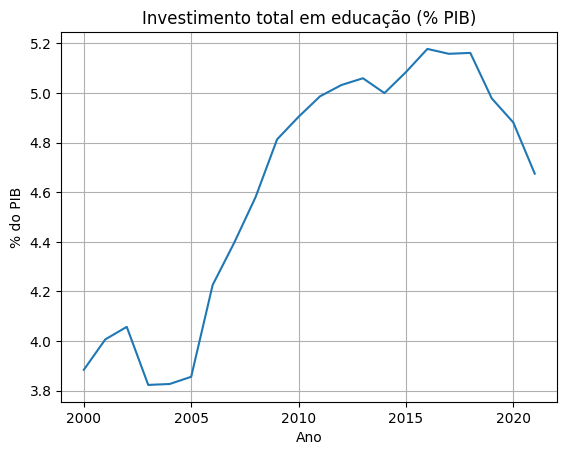

In [34]:
plt.plot(df["ano"], df["todos_niveis"])
plt.title("Investimento total em educação (% PIB)")
plt.xlabel("Ano")
plt.ylabel("% do PIB")
plt.grid(True)
plt.show()


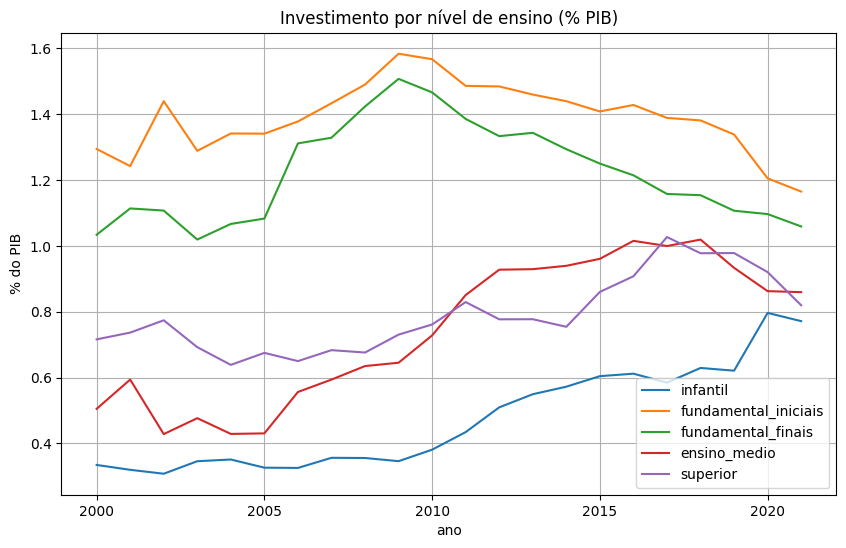

In [35]:
df.set_index("ano")[["infantil", "fundamental_iniciais", "fundamental_finais", "ensino_medio", "superior"]].plot(figsize=(10,6))
plt.title("Investimento por nível de ensino (% PIB)")
plt.ylabel("% do PIB")
plt.grid(True)
plt.show()


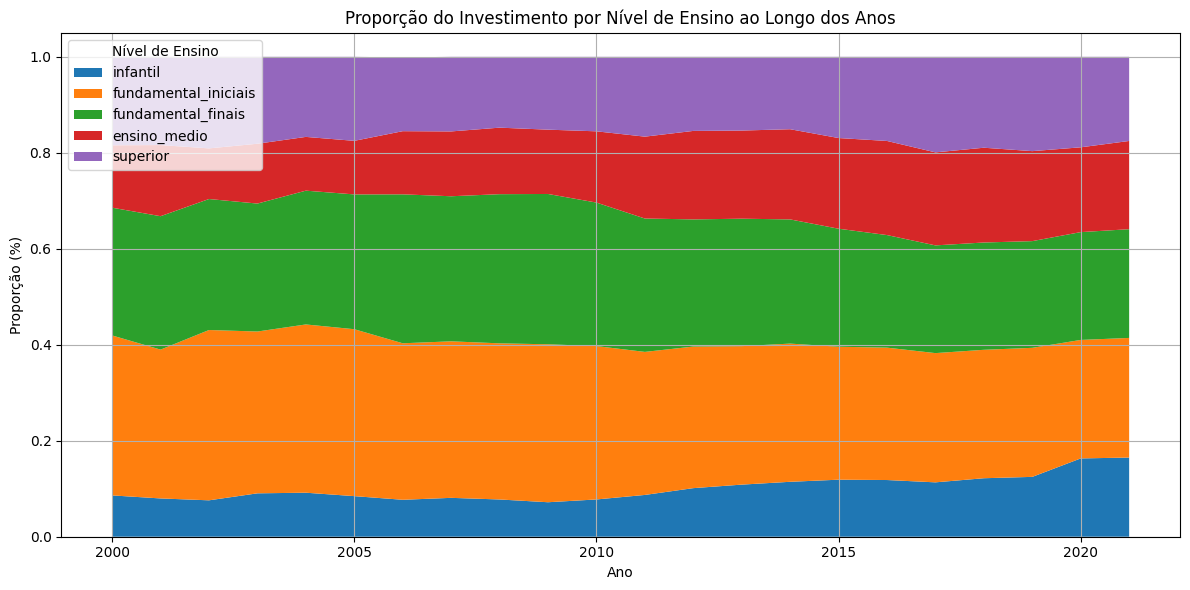

In [36]:
niveis = ["infantil", "fundamental_iniciais", "fundamental_finais", "ensino_medio", "superior"]

for col in niveis:
    df[col + "_prop"] = df[col] / df["todos_niveis"]

df_plot = df[["ano"] + [col + "_prop" for col in niveis]].set_index("ano")

plt.figure(figsize=(12, 6))
plt.stackplot(df_plot.index, df_plot.T.values, labels=niveis)

plt.title("Proporção do Investimento por Nível de Ensino ao Longo dos Anos")
plt.xlabel("Ano")
plt.ylabel("Proporção (%)")
plt.legend(title="Nível de Ensino", loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()


## Gerando o documento tratado para o PWBI :)

In [33]:
df.to_csv("../data/tratado/investimento_tratado.csv", index=False)